In [13]:
'''
Quando queremos prever valores reais utilizamos a regressão
Valor predito é a média dos 4 vizinhos mais próximos
'''
import math
import matplotlib.pyplot as plt
import numpy as np

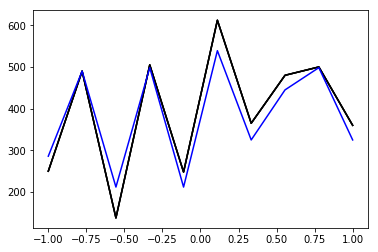

In [16]:
class KNNRegressao:
    
    def __init__(self, x, y, K=3):
        self.n_amostras = len(x)
        self.n_attrs = len(x[0])
        self.x, self.y, self.K = x, y, K
        
    def predict(self, amostra):
        d = {}
        # distancia euclidiana
        for i in range(self.n_amostras):
            soma = 0
            for j in range(self.n_attrs):
                soma += math.pow(amostra[j] - self.x[i][j], 2)
                
            d[i] = math.sqrt(soma)
        k_vizinhos = sorted(d, key=d.get)[:self.K]
        
        # media artimetica dos vizinhos mais proximos
        soma = sum([self.y[indice] for indice in k_vizinhos])
        
        return soma / self.K
    
if __name__ == "__main__":
    entradas = [[2,50], [4,90], [1,38], [5,105], [2,48],
                [6,120], [3,65], [4,80], [5,100], [3,60]]
    
    saidas = [250,490,138,505,248,
              612,365,480,500,360]
    knn = KNNRegressao(entradas, saidas, 3)
    resultado = []
    
    for entrada in entradas:
        resultado.append(knn.predict(entrada))
    
    plt.plot(np.linspace(-1,1,10), saidas, label='esperado', color='black', linewidth=1.5)
    plt.plot(np.linspace(-1,1,10), resultado, label='saída', color='blue', linewidth=1.5)
        
    plt.show()